# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

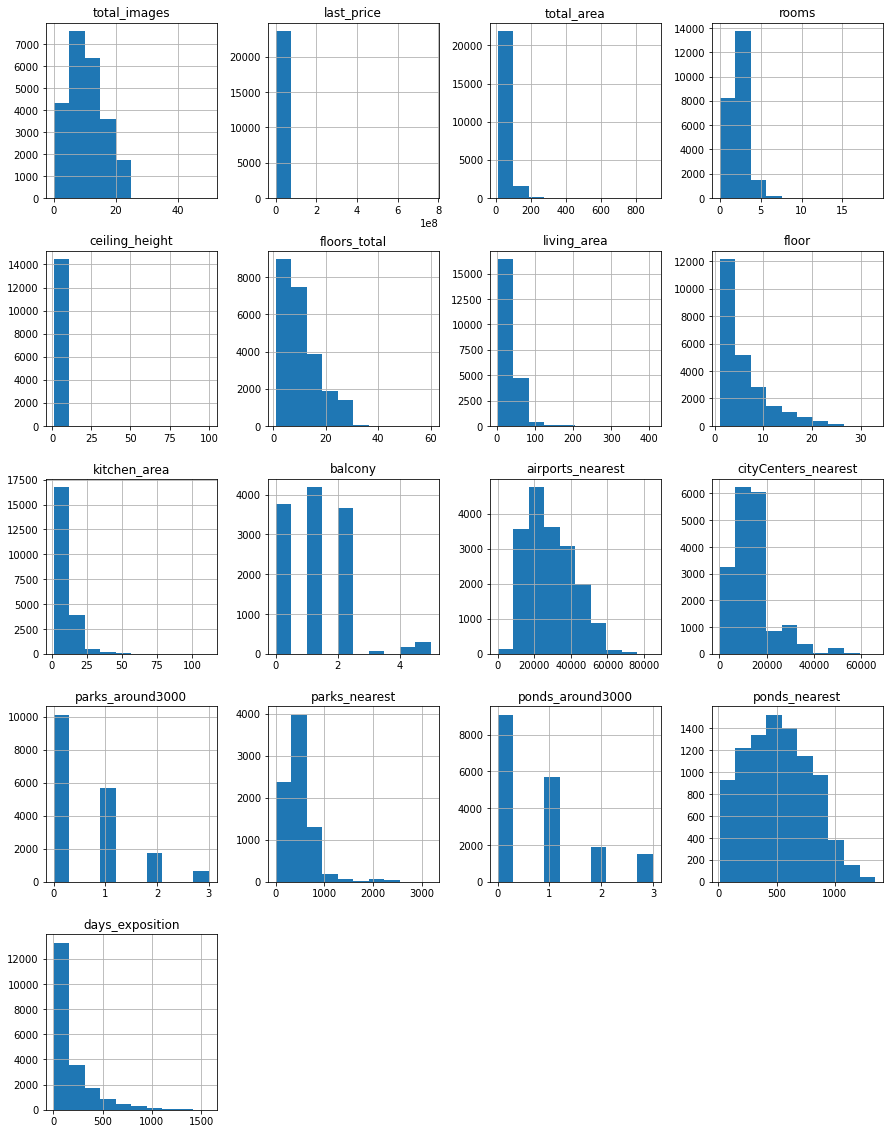

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
display(data.head())
data.hist(figsize=(15, 20)) #Изучаем файл

**Вывод:** Всего в датафрейме 23699 записи. В столбацах присутствуют NaN-значения и присвоен некорректный тип данных.

### Предобработка данных

In [2]:
print('Количество дубликатов:',data.duplicated().sum())#Дубликатов 0
print(data.duplicated())
# Стоимость квартир приводим к целоцисленному типу
data['last_price'] = data['last_price'].astype(int)
# Даты публикаций приводим к типу даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Заменяем пропущенные значения в аппартаментах
#print(data['is_apartment'].value_counts()) На все записи 50 апартаментов, смело заменяем значения
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Количество дубликатов: 0
0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23699, dtype: bool


In [3]:
# Приводим в целочисленный тип количество балконов, парков и прудов. Заменяем их пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)
#Смотрим на количество пропущенных значений
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
#Далее следует удалить записи, где отсутствуют локации и этажность, после чего этажность приводим к целочисленным значениям
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

In [5]:
#Пустые значения высоты потолков заменяем на медианное
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
# Заменяем пустые значения жилой площади и площади кухни
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

# Проверяем количество пропущенных значений
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64


In [6]:
#Смотрим уникальные значения
#data['locality_name'].unique()
#Создаем список с очищенными названиями
replace_list = ['поселок городского типа ', 'посёлок городского типа ', 'городской поселок ', 
                'городской посёлок ', 'посёлок ', 'поселок ', 'деревня ', 'село ', 'пгт'] 
data['locality_unduplicated'] = data['locality_name'] 
for replace in replace_list: 
    data['locality_unduplicated'] = data['locality_unduplicated'].str.replace(replace, '') 
print(data.locality_unduplicated.sort_values().unique())

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Виллози'
 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово' 'Володарское'
 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица' 'Выскатка'
 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина' 'Гладкое'
 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки' 'Гостилицы'
 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье' 'Дубровка'
 'Елизаветино' 'Ефимовский' 'Жилгородок' 'Жилпосёлок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кикерино' 'Кингисепп'
 'Кингисеппский' 'Кипень' 'Кириши' 'Кировск'

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.737873,10.675875,34.592277,5.878124,10.499898,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.009172,6.594823,22.373679,4.871485,6.037750,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


count    23538.000000
mean        60.372970
std         35.646653
min         20.000000
25%         40.000000
50%         52.000000
75%         69.747500
max        900.000000
Name: total_area, dtype: float64

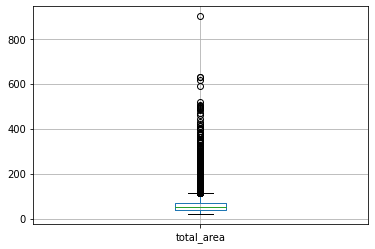

In [8]:
#Удалим квартиры общей площадью меньше 20 кв.м
data.drop(data[data['total_area'] < 20].index, inplace=True)
data.boxplot(column=['total_area'])
data['total_area'].describe()

count    23218.000000
mean        34.932530
std         22.363885
min         14.000000
25%         19.100000
50%         30.100000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

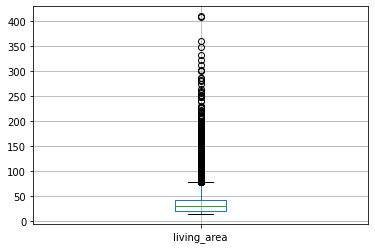

In [9]:
#Удалим квартиры с жилой площадью меньше 14 кв.м (данные из ЖК РФ)
data.drop(data[data['living_area'] < 14].index, inplace=True)
data.boxplot(column=['living_area'])
data['living_area'].describe()

count    21028.000000
mean        11.036661
std          6.073441
min          6.000000
25%          7.878357
50%          9.716640
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

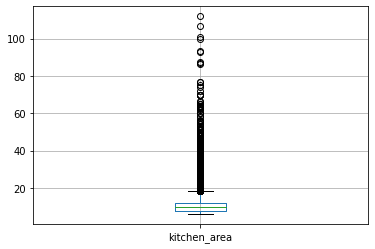

In [10]:
#Удалим квартиры с площадью кухни меньше 6 кв.м(в интернете указывают минимум от 5 до 8, поэтому взял что-то среднее)
data.drop(data[data['kitchen_area'] < 6].index, inplace=True)
data.boxplot(column=['kitchen_area'])
data['kitchen_area'].describe()

count    10028.000000
mean         2.946644
std          1.444448
min          2.700000
25%          2.700000
50%          2.760000
75%          3.000000
max        100.000000
Name: ceiling_height, dtype: float64

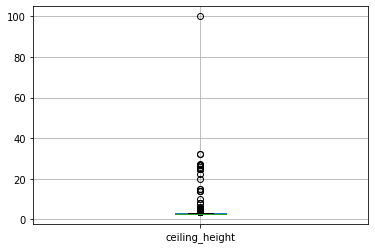

In [11]:
#Удалим квартиры с высотой потолков меньших 2.7 метра(данные из интернета)
data.drop(data[data['ceiling_height'] < 2.7].index, inplace=True)
data.boxplot(column=['ceiling_height'])
data['ceiling_height'].describe()

298


count    9730.000000
mean        2.858398
std         0.189442
min         2.700000
25%         2.700000
50%         2.750000
75%         3.000000
max         3.500000
Name: ceiling_height, dtype: float64

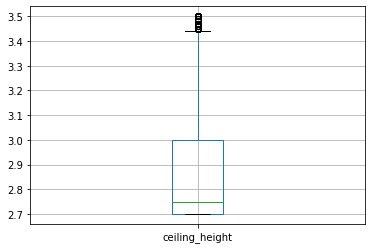

In [12]:
#Выведем количество квартир в которых потолки выше 3.5м
print(len(data.loc[data['ceiling_height'] > 3.5]))
#298 квартир
#Удалим данные квартиры
data.drop(data[data['ceiling_height'] > 3.5].index, inplace=True)
data.boxplot(column=['ceiling_height'])
data['ceiling_height'].describe()

**Вывод:**
1. Причинами пропуска данных мог послужить человеческих фактор, из-за чего данные могли быть некорректны 
2. Изменить тип данных следует для дальнейшей работы с этими данными
3. Главной особенностью как я и указывал выше, являются пропущенные значения, которые пришлось исправить

In [13]:
data['ceiling_height'].unique()

array([2.7  , 3.03 , 2.75 , 3.05 , 3.   , 2.9  , 2.8  , 2.76 , 3.2  ,
       3.15 , 3.25 , 3.45 , 2.77 , 2.85 , 3.5  , 3.3  , 2.71 , 2.73 ,
       2.84 , 3.1  , 3.4  , 3.06 , 2.72 , 2.78 , 2.745, 2.87 , 2.775,
       2.725, 3.11 , 3.13 , 3.16 , 3.12 , 2.74 , 2.96 , 2.79 , 2.95 ,
       2.94 , 2.83 , 3.325, 3.38 , 3.01 , 2.735, 3.18 , 3.35 , 2.82 ,
       2.92 , 2.88 , 3.24 , 3.36 , 3.08 , 3.07 , 3.37 , 3.09 , 3.26 ,
       3.34 , 2.775, 2.81 , 3.44 , 3.14 , 3.22 , 3.27 , 2.93 , 3.46 ,
       2.785, 3.47 , 3.33 , 3.32 , 2.98 , 2.86 , 3.17 , 3.28 , 3.04 ,
       3.23 , 2.97 , 3.02 , 3.21 , 3.43 , 3.39 , 3.31 , 3.42 , 3.49 ,
       2.91 , 2.715, 3.29 , 3.48 ])

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
#Добавим столбец c ценой одного квадратного метра
data['price_sm'] = data['last_price'] / data['total_area']
#Привоим к целочисленному типу
data['price_sm'] = data['price_sm'].astype(int)

In [15]:
#Добавим столбец с днем недели
data['weekday'] = data['first_day_exposition'].dt.weekday
#Добавим столбец с месяцами
data['month'] = data['first_day_exposition'].dt.month
#Добавим столбец с годами
data['year'] = data['first_day_exposition'].dt.year

In [16]:
#Добавим тип этажа квартиры
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

In [17]:
#Добавим столбец с переводом метров в км
data['distance_km'] = (data['cityCenters_nearest'] / 1000).round()

**Вывод:** Были добавлены новые столбы с ценой одного квадратного метра, с днем недели, месяцем, годом, типом этажа, с переводом метров в км.

### Проведите исследовательский анализ данных

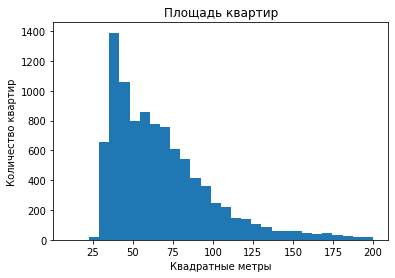

In [18]:
#Изучим общую площадь
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Общая площадь:** Наибольшая составляющая квартир в районе 100 кв.м., однако встречаются квартиры и с большим показателем, но их не так много.

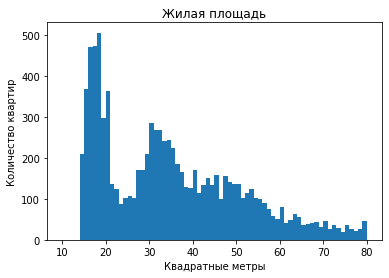

In [19]:
#Изучаем жилую площадь
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Жилая площадь:** В данном случае чаще встречаются значения от 10 до 50 кв.м. После 50 кв.м. единичные варианты квартир.

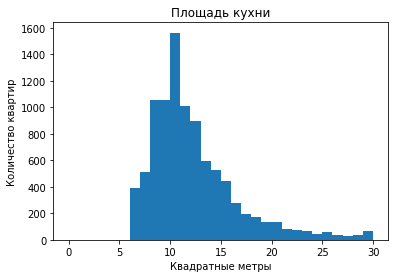

In [20]:
#Изучаем площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Площадь кухни:** Площадь кухни в квартирах имеет популярность в значениях от 5 до 15 кв.м. После 15 кв.м также единичные случаи.

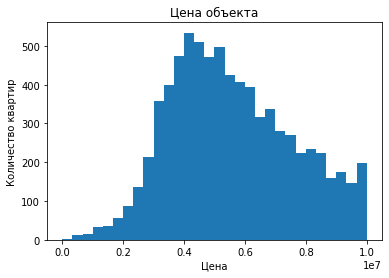

In [21]:
#Изучаем цену объекта
#data['last_price'].max()
plt.hist(data['last_price'], bins=30, range=(0,10000000))
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

**Цена объекта:** Популярная цена объекта варьируется от 3-х до 5-ти миллионов.

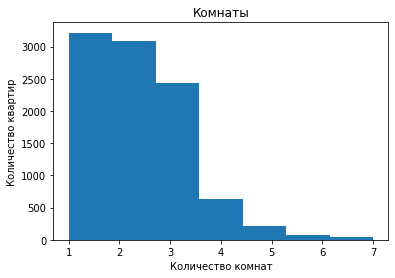

In [22]:
#Изучаем количество комнат в квартире
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Количество комнат:** В лидерах по количеству выступают квартиры с 1-ой и 2-мя комнатами, после же идут квартиры с 3-мя комнатами. Квартиры с 4-мя и более комнатами имеет наименьшее значение.

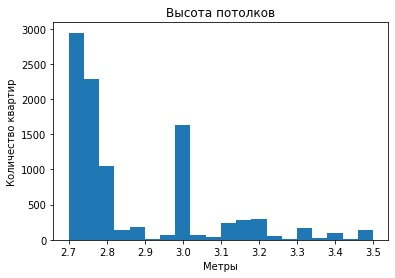

In [23]:
#Изучаем высоту потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**Высота потолков:** Оптимальной высотой выступают значения от 2.5 до 3-х метров. В данных присутствуют значения свыше 20 м., что скорее всего является ошибкой и имелось в виду 2м.

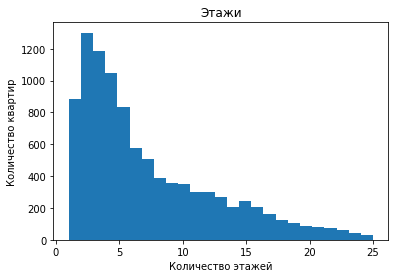

In [24]:
#Изучаем этажность
plt.hist(data['floor'], bins=25, range=(1,25))
plt.title('Этажи')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

**Этаж квартиры:** В большинстве случаев квартиры находятся с 1 по 5 этаж.

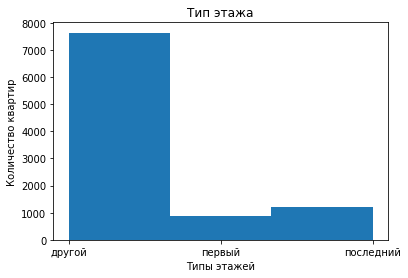

In [25]:
#Изучаем тип этажа квартиры
plt.hist(data['floor_type'], bins=3)
plt.title('Тип этажа')
plt.xlabel('Типы этажей')
plt.ylabel('Количество квартир')
plt.show()

**Тип этажа квартиры («первый», «последний», «другой»):** На графике видно, что предпочтительными этажами являются этажи между первым и последним.

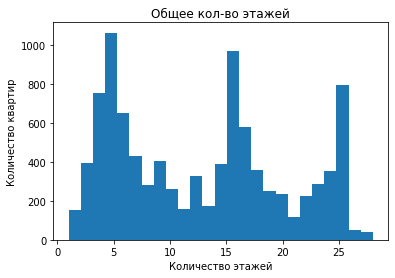

In [26]:
#Изучаем общее количество этажей в доме
plt.hist(data['floors_total'], bins=25, range=(1,28))
plt.title('Общее кол-во этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

**Общее количество этажей в доме:** На графике видно, что лидирующие позиции занимают 5-тиэтажки и 9-тиэтажки.

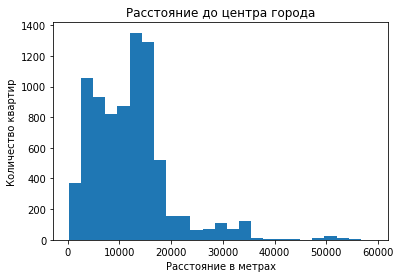

In [27]:
#Изучаем расстояние до центра города в метрах
plt.hist(data['cityCenters_nearest'], bins=25)
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до центра города в метрах:** Преобладают квартиры на расстоянии от центра в 15-20 тысяч метров.

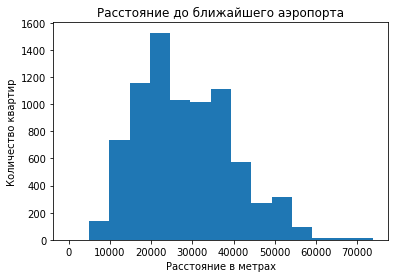

In [28]:
#Изучаем расстояние до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=15)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до ближайшего аэропорта:** Пик расстояния имеют квартиры на расстоянии до ближайшего аэропорта в 10-30 тысяч метров.

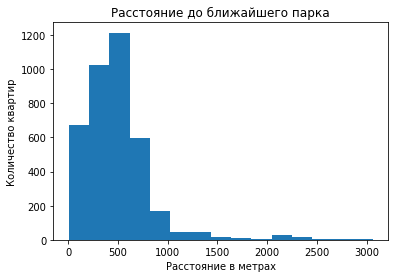

In [29]:
#Изучаем расстояние до ближайшего парка
plt.hist(data['parks_nearest'], bins=15)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до ближайшего парка:** Расстояние до ближайшего парка практически минимальное, варьируется от 0(рядом с парком) и в районе 1 км.

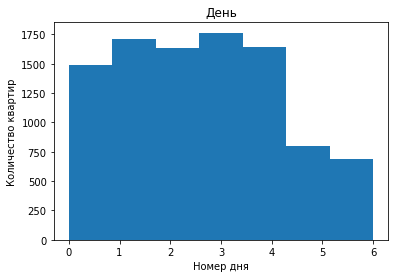

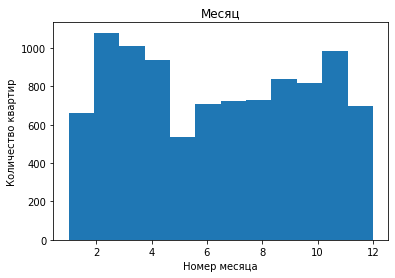

In [30]:
#Изучаем день и месяц публикации объявления
plt.hist(data['weekday'], bins=7)
plt.title('День')
plt.xlabel('Номер дня')
plt.ylabel('Количество квартир')
plt.show()

plt.hist(data['month'], bins=12)
plt.title('Месяц')
plt.xlabel('Номер месяца')
plt.ylabel('Количество квартир')
plt.show()

**День и месяц публикации объявления:** В будние дни объявления выкладывают чаще, чем в выходные. Также в зимний и осенний период объявления выкладывают чаще, чем в весенний и летний.

**Изучим, как быстро продавались квартиры**

In [31]:
#Посчитаем среднее и медиану
print('Среднее время продажи:', data['days_exposition'].mean())
print('Медианное время продажи',data['days_exposition'].median())

Среднее время продажи: 198.9635472690331
Медианное время продажи 106.0


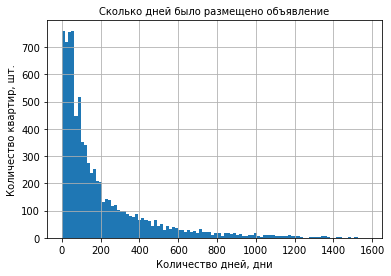

count    8367.000000
mean      198.963547
std       238.346849
min         2.000000
25%        45.000000
50%       106.000000
75%       259.000000
max      1572.000000
Name: days_exposition, dtype: float64

In [32]:
data.hist('days_exposition', bins=100)
plt.title('Сколько дней было размещено объявление', size=10)
plt.xlabel('Количество дней, дни')
plt.ylabel('Количество квартир, шт.')
plt.show()
data['days_exposition'].describe()

**Вывод:** 
- Среднее время продажи - 181 день;
- Медианное время продажи - 95 дней;
- На графике можно заметить, что большинство квартир продается до 100 дней. Также видно, что пик продаж около 45-50 дней. Здесь конечно присутствуют значения и выше, и выбросы после 1200 дней.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта:**

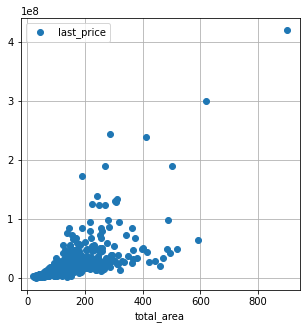

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.745216
total_area    0.745216    1.000000 



In [33]:
#Цена от общей площади + корреляция
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(style='o',grid=True ,figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

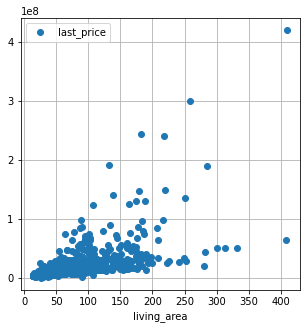

Корреляция цены и жилой площади 

             last_price  living_area
last_price     1.000000     0.630806
living_area    0.630806     1.000000 



In [34]:
#Цена от жилой площади + корреляция
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(style = 'o', grid=True, figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

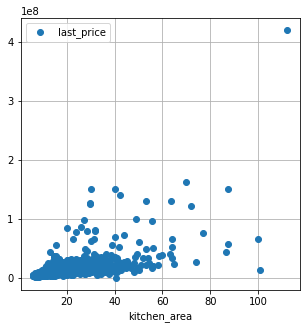

Корреляция цены и площади кухни 

              kitchen_area  last_price
kitchen_area      1.000000    0.140681
last_price        0.140681    1.000000 



In [35]:
#Цена от площади кухни + корреляция
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(style = 'o', grid=True, figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

**Цена от площади:** По корреляции и данным из таблиц видно, что чем больше площадь, тем больше цена, так и в обратную сторону.

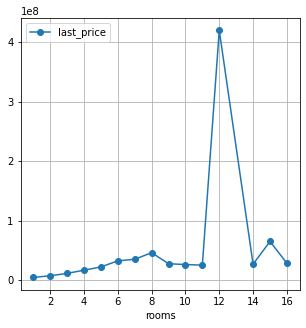

Корреляция цены и количества комнат 

            last_price     rooms
last_price    1.000000  0.405663
rooms         0.405663  1.000000 



In [36]:
#Цена от количества комнат + корреляция
(
    data.query('rooms > 0')
    .pivot_table(index='rooms', values='last_price')
    .plot(style='o-', grid=True, figsize=(5,5))
)
plt.show()
print('Корреляция цены и количества комнат','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

**Цена от комнат:** Цена здесь также заивисит от количества комнат, однако по сравнению с площадью - меньше.

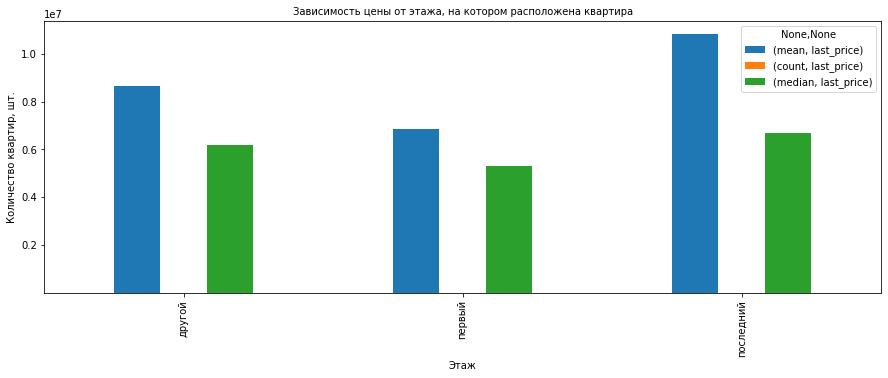

In [37]:
#Цена от этажа, на котором находится квартира
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc=['mean', 'count', 'median'])
    .plot(kind='bar', figsize=(15, 5))
)
plt.ylim(bottom=1000)
plt.title('Зависимость цены от этажа, на котором расположена квартира', size=10)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир, шт.')
plt.show()

**Цена от этажа:** По данным видно, что самые дорогие квартиры располагаются между 1-м и последними этажами.

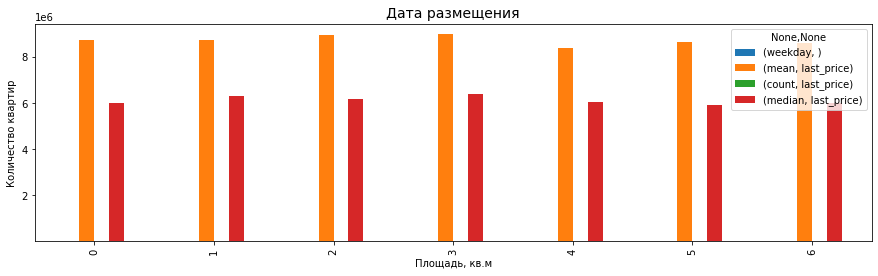

In [38]:
#Цена от даты размещений(день)
(
    data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'count', 'median'])
    .reset_index()
    .plot(kind='bar', figsize=(15, 4))
)
plt.ylim(bottom=1000)
plt.title('Дата размещения', size=14)
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

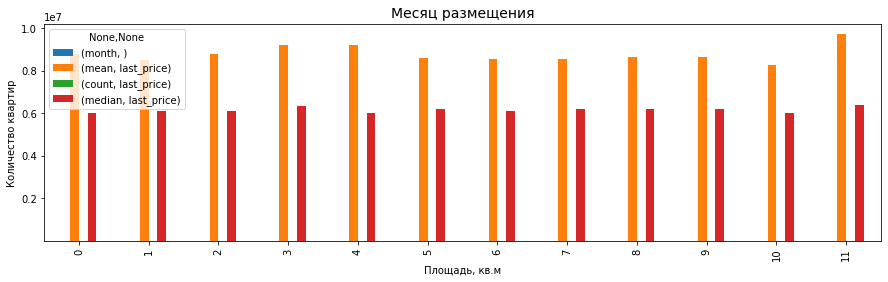

In [39]:
#Цена от даты размещений(месяц)
(
    data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'count', 'median'])
    .reset_index()
    .plot(kind='bar', figsize=(15, 4))
)
plt.ylim(bottom=1000)
plt.title('Месяц размещения', size=14)
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

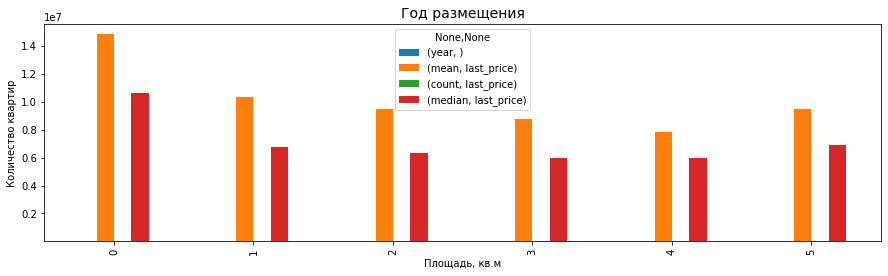

In [40]:
#Цена от даты размещений(год)
(
    data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'count', 'median'])
    .reset_index()
    .plot(kind='bar', figsize=(15, 4))
)
plt.ylim(bottom=1000)
plt.title('Год размещения', size=14)
plt.xlabel('Площадь, кв.м')
plt.ylabel('Количество квартир')
plt.show()

**Цена от даты:** 
- Как уже упомяналось выше, цена также зависит от дня - в будние больше, в выходные меньше;
- По месяцам заметно, что пик в начале и в конце года; 
- По первым годам сложно сделать какой-то вывод, скорее всего данные были утеряны или не внесены, последующие же года уже выглядят более-менее правдоподобно и по ним можно увидеть зависимость.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [41]:
#Выводим 10 населенных пунктов с наибольшим числом объявлений
lu = (
    data.groupby('locality_unduplicated')['price_sm']
    .agg(['median', 'count'])
    .sort_values(by='count', ascending=False)
    .head(10)
)
#lu

In [42]:
print(lu.sort_values(by='median', ascending=False).head(3))
print(lu.sort_values(by='median', ascending=False).tail(3))

                         median  count
locality_unduplicated                 
Санкт-Петербург        113849.0   7493
Пушкин                 106707.0    116
Сестрорецк              98958.0     93
                        median  count
locality_unduplicated                
Колпино                75268.0     68
Гатчина                71471.0     58
Всеволожск             69045.0    164


**Вывод:** В первом выводе представлены данные с самой высокой стоимостью, во втором с самой низкой.

**Вычислить среднюю цену каждого километра**

,price_sm
cityCenters_nearest_km,
0,170895.931034
1,162036.189024
2,139446.915179
3,123281.264249
4,136661.456221
5,150292.841603
6,162110.439024
7,157998.353659
8,126971.810219


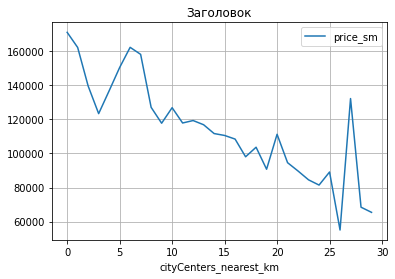

In [43]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
means = (
    data.query('locality_unduplicated == "Санкт-Петербург" and cityCenters_nearest_km !=999999')
    .pivot_table(index = 'cityCenters_nearest_km', values = 'price_sm', aggfunc = 'mean')
)
means.plot(grid = True, title = 'Заголовок')
means

**Вывод:** По графику видно, что после 5км зависимость убывает. Т.е. чем ближе квартира к центру города, тем дороже будет ее стоимость.

### Общий вывод

В данном проекте были изучены предоставленные материалы, была проведена предобратка данных,исследовательский анализ данных, также были добавлены новые столбы, которые в дальнейшем помогли разобраться с данными. Конечно, к каждому пункту шел вывод, в котором описывались детали проведенных действий. 
В процессе предобратки данных были изменены данные, которые могли сбить столку и отвлечь от важной информации. Также были приведены столбы к нужному типу данных. 
На основе всех предоставленных выше данных можно сделать вывод о том, что существует большая зависимость между ценой и факторами, присущих квартире(площадь, этаж, расстояние до центра, аэропорта, парка и т.д.).
1. На графиках можно заметить, что большинство квартир продается до 100 дней. Пик продаж около 45-50 дней.
2. Наибольшая составляющая площадь квартир в районе 100 кв.м.
3. Популярная цена квартиры составляет 3-5 миллиона
4. В будние дни объявления выкладывают чаще, чем в выходные. Также в зимний и осенний период объявления выкладывают чаще, чем в весенний и летний.
